# cics dev stats

## Introduction

The [github-repo-stats GitHub Action](https://github.com/marketplace/actions/github-repo-stats) collects stats and [generates reports for each repository in the cicsdev organisation](https://github.com/cicsdev/repo-stats/tree/github-repo-stats/cicsdev) individually.

This workbook is an attempt to create a report across the data for all cicsdev repositories.

## Fetch and load data

The following curl command will download the latest output of the github-repo-stats action, including the raw data in csv files.

In [ ]:
!curl -sSL "https://github.com/cicsdev/repo-stats/archive/heads/github-repo-stats.tar.gz" | tar -C ../.data --strip-components=1 -xzf -

Next, some imports and initial setup.

In [12]:
# Import all the things
import glob
import pandas as pd
from datetime import datetime
from functools import reduce
from numpy import int64

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
# Setup graphs
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('axes', axisbelow=True)

Now load and merge the data.

In [17]:

csv_files = glob.iglob("../.data/**/ghrs-data/views_clones_aggregate.csv", recursive=True)
dfs = [
    pd.read_csv(csv_file, header=0, names=['date', csv_file.split('/')[3]], usecols=[0, 3]) for csv_file in csv_files
]

for df in dfs:
    df['date'] = df['date'].astype('datetime64[ns, UTC]')
    df.set_index('date', inplace = True)

# TODO why doesn't parsing the date work when loading?
# dfs = [
#     pd.read_csv(csv_file, header=0, names=['date', csv_file.split('/')[3]], usecols=[0, 3], parse_dates=[0], date_format=lambda t: pd.to_datetime(t, utc=True).to_datetime64()) for csv_file in csv_files
# ]
# map(lambda df: df.set_index('date', inplace = True), dfs)

merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer').fillna(0), dfs)

monthly_df = merged_df.groupby([lambda x: x.year, lambda x: x.month]).sum()
monthly_df.tail()

cics-async-api-credit-card-application-example  \
date date                                                   
2024 1                                              122.0   
     2                                              231.0   
     3                                              253.0   
     4                                               27.0   
     5                                               80.0   

           cicstg-client-blocker  blog-cics-java-liberty-ejb  \
date date                                                      
2024 1                       0.0                        47.0   
     2                       5.0                         5.0   
     3                       7.0                         8.0   
     4                      12.0                         4.0   
     5                       0.0                         2.0   

           cics-eventprocessing-java  cpsm-cicsplex-name-detector  \
date date                                                           
2024 1                           1.0                          7.0   
     2                         193.0                          7.0   
     3                          36.0                         26.0   
     4                          15.0                         20.0   
     5                           3.0                          6.0   

           cicstg-cloud-monitor  cics-blog-sample-files  \
date date                                                 
2024 1                      0.0                     0.0   
     2                      0.0                     1.0   
     3                      1.0                     5.0   
     4                      7.0                     0.0   
     5                      0.0                     0.0   

           cics-java-liberty-jaspic-jwt  cics-java-recgen  \
date date                                                   
2024 1                              0.0             447.0   
     2                             13.0             608.0   
     3                              0.0             354.0   
     4                             47.0             391.0   
     5                              4.0              35.0   

           cics-java-liberty-mq-jms  ...  cics-java-liberty-springboot-jdbc  \
date date                            ...                                      
2024 1                         56.0  ...                              411.0   
     2                        154.0  ...                              455.0   
     3                         67.0  ...                              196.0   
     4                         83.0  ...                               58.0   
     5                         52.0  ...                                7.0   

           cics-async-fetch-variation-example  cics-nodejs-exci-webapp-sample  \
date date                                                                       
2024 1                                   11.0                            26.0   
     2                                   29.0                             0.0   
     3                                   48.0                            35.0   
     4                                   44.0                            20.0   
     5                                    5.0                             3.0   

           cics-java-liberty-globalhandler  cics-nodejs-invoke  \
date date                                                        
2024 1                                 0.0               217.0   
     2                                 0.0               126.0   
     3                                 1.0               105.0   
     4                                 0.0                87.0   
     5                                 1.0                82.0   

           cics-java-osgi-ds  cics-java-liberty-springboot-jdbc-multi  \
date date                                                               
2024 1                  27.0                                    184.0   
    

## Views for April

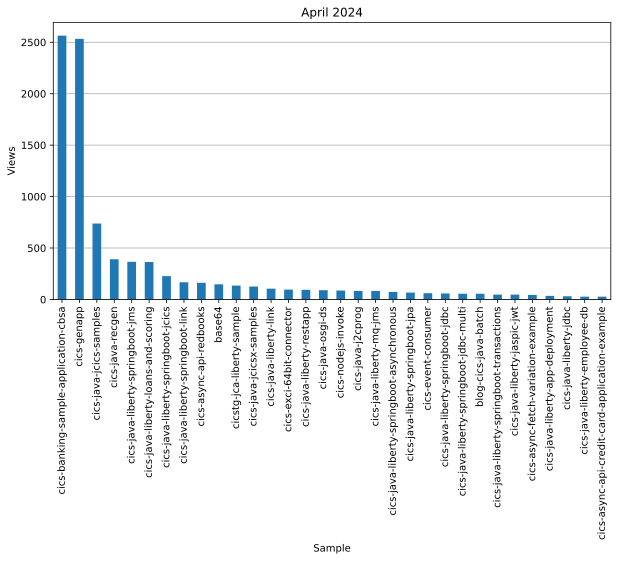

In [36]:
april_sf = monthly_df.xs((2024, 4))

# TODO: make mask configurable?
april_mask = april_sf > 25

april_plot = april_sf[april_mask].sort_values(ascending=False).plot.bar(title='April 2024',xlabel='Sample',ylabel='Views')
april_plot.grid(axis='y')

## Future

The notebook is pretty basic at the moment but hopefully it's a useful start! Still to come:

- make the month configurable?
- add graph of total views for all samples by date
- add configurable quarterly graph?

Plus any other requested improvements!